# Cleaning Data: Resizing

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import cv2
%matplotlib inline

## Visualizing the Dataset

In [2]:
pwd

'/home/emilyma/code/FlorenceBoutin/GI_disease_detection/notebooks'

In [3]:
cd ..

/home/emilyma/code/FlorenceBoutin/GI_disease_detection


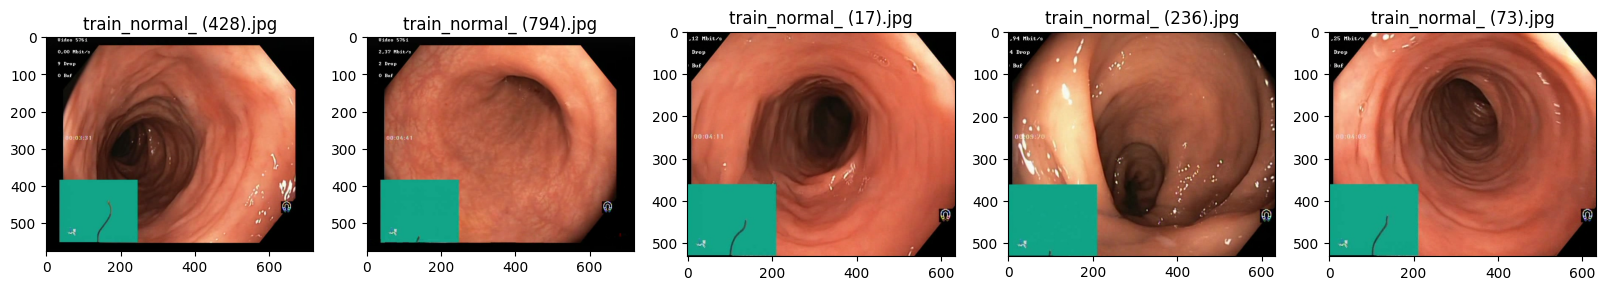

In [4]:
plt.figure(figsize = (20, 20))
train_normal = r"raw_data/train/0_normal"
for i in range(5):
    file = random.choice(os.listdir(train_normal))
    image_path = os.path.join(train_normal, file)
    img = mpimg.imread(image_path)
    ax = plt.subplot(1, 5, i + 1)
    ax.title.set_text(file)
    plt.imshow(img)

## Resizing

In [5]:
import cv2

In [6]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        if img is not None:
            images.append(img_rgb)
    return images

In [7]:
train_normal = load_images_from_folder("raw_data/train/0_normal")

In [8]:
train_normal[0].shape

(532, 633, 3)

In [9]:
def resize_images(images):
    res_images = []
    for image in images:
        res_image = cv2.resize(image, (224, 224))
        res_images.append(res_image)
    return res_images

In [10]:
res_train_normal = resize_images(train_normal)

In [11]:
res_train_normal[0].shape

(224, 224, 3)

In [12]:
def normalize_images(images):
    norm_images = []
    for image in images:
        norm_image = image / 255
        norm_images.append(norm_image)
    return norm_images

In [13]:
norm_train_normal = normalize_images(res_train_normal)

In [14]:
norm_train_normal[0]

array([[[0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0.00784314, 0.00784314],
        ...,
        [0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0.00784314, 0.00784314]],

       [[0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0.00784314, 0.00784314],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       [[0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0.00784314, 0.00784314],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       ...,

       [[0.29803922, 0.54117647, 0.49803922],
        [0.08235294, 0.61568627, 0.50588235],
        [0.04705882, 0

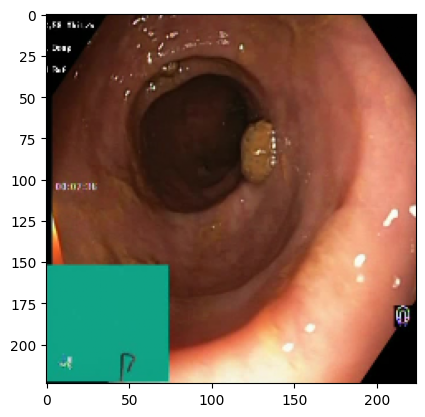

In [15]:
plt.imshow(norm_train_normal[0])

In [16]:
len(norm_train_normal)

800

In [17]:
norm_train_normal[0].shape

(224, 224, 3)

In [18]:
from tensorflow import convert_to_tensor

2023-03-06 16:29:38.435245: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-06 16:29:40.235012: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/emilyma/.pyenv/versions/3.10.6/envs/GI_disease_detection/lib/python3.10/site-packages/cv2/../../lib64:
2023-03-06 16:29:40.235182: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-06 16:29:43.992213: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not lo

In [19]:
tensor_train_normal = convert_to_tensor(norm_train_normal)

2023-03-06 16:29:46.250574: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/emilyma/.pyenv/versions/3.10.6/envs/GI_disease_detection/lib/python3.10/site-packages/cv2/../../lib64:
2023-03-06 16:29:46.251106: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-06 16:29:46.251318: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-FEC965N): /proc/driver/nvidia/version does not exist
2023-03-06 16:29:46.254099: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operation

In [20]:
tensor_train_normal.shape

TensorShape([800, 224, 224, 3])

## Using Tensorflow

In [21]:
from tensorflow.keras.utils import image_dataset_from_directory

In [22]:
def import_images(folder):
    images = image_dataset_from_directory(folder,
                                         labels = "inferred",
                                         label_mode = "categorical",
                                         color_mode = "rgb",
                                         batch_size = 32,
                                         image_size = (224, 224))
    return images

In [23]:
train = import_images("/home/emilyma/code/FlorenceBoutin/GI_disease_detection/raw_data/train")

Found 3200 files belonging to 4 classes.


In [24]:
train

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [26]:
def import_images2(folder):
    rescaled_images = ImageDataGenerator(rescale = 1. / 255)
    images = rescaled_images.flow_from_directory(folder,
                                                target_size = (224, 224), 
                                                color_mode = "rgb", 
                                                batch_size = 32, 
                                                class_mode = "categorical")
    return images

In [27]:
train2 = import_images2("/home/emilyma/code/FlorenceBoutin/GI_disease_detection/raw_data/train")

Found 3200 images belonging to 4 classes.


In [28]:
train2